In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ticker
import pandas as pd
from glob import glob
from scipy import interpolate as interp
from scipy.special import erf
from collections import OrderedDict
import os
import matplotlib.font_manager

plt.style.use('mvstyle')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 3.5, 2.7
rootdir = os.getcwd()


In [37]:
mTOcm = 100.                           # m to cm
cmTOm = 1. / 100.                      # cm to m
kmTOm = 1000.                          # km to m
mTOkm = 1. / 1000.                     # m to km
mTOpm = 1e12                           # m to pm
pmTOm = 1e-12                          # pm to m
mTOfm = 1e15                           # m to fm
fmTOm = 1e-15                          # fm to m
kgTOg = 1000.                          # kg to g
gTOkg = 1. / 1000.                     # g to kg
PaTOdynpcm2 = 10.                      # (*Pascals to dyne/cm^2*)
inveVTOm = 197.3269788 * fmTOm         # (*MeV m*)
mTOinveV = 1. / (197.3269788 * fmTOm)  # (*(MeV m)^-1*)
inveVTOs = 6.582119514e-22
sTOinveV = 1. / (6.582119514e-22)

cspeed = 3e8 #m/s
me = 0.511

alphaEM = 1/137.0
echarge = np.sqrt(4.0 * np.pi * alphaEM)

# Plotters

In [ ]:
def filter_list(filter, list = []):
    return [x for x in list if filter in x]

In [ ]:
files_crate_all_full = glob('./crate_all/crate_operdn_full_*')
files_crate_all_npb  = glob('./crate_all/crate_operdn_npb_*')
files_crate_all_ms   = glob('./crate_all/crate_operdn_multiscatt_*')
files_crate_complete = glob('crate_all/complete/crate_complete_*')
files_crate_all_uapx = glob('./crate_all/crate_operdn_uappx_*')
files_crate_all_temp = glob('./crate_finite_temp/crate_finite_T_operdn_full_*')

In [ ]:
# new = pd.read_csv('./EoSs/FMT_1.38367_Msun_C.dat', header = 0, sep = '\t')
# old  = pd.read_csv('FMT_largemass_data.dat', header = 0, sep = '\t')

In [ ]:
# elem = new.columns[4]

# fig, ax = plt.subplots()

# ax.plot(new['r[m]'], old[elem]/new[elem])
# ax.set_yscale('log')
# ax.set_xscale('log')

# ax.set_ylim(0.9, 1.1)

In [ ]:

# WD_masses = []

# for file in files_crate_all_full:
#     temp = file.rstrip('.dat')
#     temp = temp.lstrip('./crate_all/crate_operdn_full_')
#     WD_masses.append(float(temp))

# crate_all_full_data = {}

# for file in files_crate_all_full:
#     temp = file.rstrip('.dat')
#     temp = temp.lstrip('./crate_all/crate_operdn_full_')
#     crate_all_full_data[float(temp)] = pd.read_csv(file, header=0, sep = '\t')
    
# crate_all_npb_data = {}

# for file in files_crate_all_npb:
#     temp = file.rstrip('.dat')
#     temp = temp.lstrip('./crate_all/crate_operdn_npb_')
#     crate_all_npb_data[float(temp)] = pd.read_csv(file, header=0, sep = '\t')

# crate_all_ms_data = {}

# for file in files_crate_all_ms:
#     temp = file.rstrip('.dat')
#     temp = temp.lstrip('./crate_all/crate_operdn_multiscatt_')
#     crate_all_ms_data[float(temp)] = pd.read_csv(file, header=0, sep = '\t')

# crate_complete_data = {}

# for file in files_crate_complete:
#     temp = file.rstrip('.dat')
#     temp = temp.lstrip('./crate_all/crate_complete_')
#     crate_complete_data[float(temp)] = pd.read_csv(file, header=0, sep = '\t')

# crate_all_uapx_data = {}

# for file in files_crate_all_uapx:
#     temp = file.rstrip('.dat')
#     temp = temp.lstrip('./crate_all/crate_operdn_uappx_')
#     crate_all_uapx_data[float(temp)] = pd.read_csv(file, header=0, sep = '\t')

# crate_all_temp_data = {}

# for file in files_crate_all_temp:
#     temp = file.rstrip('.dat')
#     temp = temp.lstrip('./crate_finite_temp/crate_finite_T_operdn_full_')
#     crate_all_temp_data[float(temp)] = pd.read_csv(file, header=0, sep = '\t')

# # crate_full_uappx_data =  pd.read_csv('crate_operdn_uappx.dat', header = 0, sep = '\t')
# # crate_full_npb_temp_data =  pd.read_csv('crate_finite_T_operdn_npb.dat', header = 0, sep = '\t')
# # crate_full_temp_data =  pd.read_csv('crate_finite_T_operdn_full_1.154.dat', header = 0, sep = '\t')
# # crate_full_multiscatt_data =  pd.read_csv('crate_operdn_multiscatt.dat', header = 0, sep = '\t')
# # g_comp_data = pd.read_csv('giorgio_comp.dat', header = None, sep = '\t')
# # os.chdir(rootdir)

# # os.chdir('./crate_single/')
# # single_temp_data = pd.read_csv('single_op_finite_T_full.dat', header = None, sep = '\t')
# # os.chdir(rootdir)

mass_range = np.concatenate((crate_all_full_data[WD_masses[0]]['mDM_(MeV)'].to_numpy(), crate_all_npb_data[WD_masses[0]]['mDM_(MeV)'].to_numpy(), crate_all_ms_data[WD_masses[0]]['mDM_(MeV)'].to_numpy()) )

mass_range = list(OrderedDict.fromkeys(mass_range))

In [ ]:
def crate_dtdep_plots_full_range(wdnum):

    # data_1 = crate_all_full_data[wdnum]
    # data_2 = crate_all_npb_data[wdnum]
    # data_3 = crate_all_ms_data[wdnum]

    data = crate_complete_data[wdnum]
    
    fig, ax = plt.subplots()

    for n in range(len(data.columns))[1:5]:
        ax.loglog(data['mDM_(MeV)'], data['D'+str(n)], color = 'C'+str(n),label = r'$\rm{{D{}}}$'.format(str(n)))
        # ax.loglog(data_2['mDM_(MeV)'], data_2['D'+str(n)]/2, color = 'C'+str(n))
        # ax.loglog(data_3['mDM_(MeV)'], data_3['D'+str(n)], color = 'C'+str(n))
        
    ax.set_xlim(1e-1, 1e7)
    ax.set_xlabel(r'$m_\chi\;(\rm{MeV})$')

    ax.set_ylim(1e20, 1e43)
    ax.set_ylabel(r'$C\Lambda^4\; (\rm{MeV^4/s})$')

    ax.set_title(r'${}\;M_\odot$'.format(wdnum))
    
    locmajx = ticker.LogLocator(base = 10.0, numticks=20)
    ax.xaxis.set_major_locator(locmajx)
    locminx = ticker.LogLocator(base=10.0, subs=np.linspace(0.1, 0.9, 9), numticks=100)
    ax.xaxis.set_minor_locator(locminx)
    ax.xaxis.set_minor_formatter(ticker.NullFormatter())
    locmajy = ticker.LogLocator(base=10.0, numticks=40)
    ax.yaxis.set_major_locator(locmajy)
    locminy = ticker.LogLocator(base=10.0, subs=np.linspace(0.1, 0.9, 9), numticks=100)
    ax.yaxis.set_minor_locator(locminy)
    ax.yaxis.set_minor_formatter(ticker.NullFormatter())
    temp = ax.yaxis.get_ticklabels()
    temp = list(set(temp) - set(temp[::2]))
    for label in temp:
        label.set_visible(False)
        
    ax.legend()
    os.chdir(rootdir)
    os.chdir('./crate_all/figs/')
    figname = 'coper_14_WD_'+ str(wdnum) + '.pdf'
    plt.savefig(figname)
    os.chdir(rootdir)
    plt.show()
    
# for i in range(len(WD_masses)):
# crate_dtdep_plots_full_range(WD_masses[1])

In [ ]:
def crate_dsdep_plots_full_range(wdnum):

    # data_1 = crate_all_full_data[wdnum]
    # data_2 = crate_all_npb_data[wdnum]
    # data_3 = crate_all_ms_data[wdnum]

    data = crate_complete_data[wdnum]
    
    fig, ax = plt.subplots()

    for n in range(len(data.columns))[5:11]:
        ax.loglog(data['mDM_(MeV)'], data['D'+str(n)], color = 'C'+str(n),label = r'$\rm{{D{}}}$'.format(str(n)))
        # ax.loglog(data_2['mDM_(MeV)'], data_2['D'+str(n)]/2, color = 'C'+str(n))
        # ax.loglog(data_3['mDM_(MeV)'], data_3['D'+str(n)], color = 'C'+str(n))
        
    ax.set_xlim(1e-1, 1e14)
    ax.set_xlabel(r'$m_\chi\;(\rm{MeV})$')

    # ax.set_ylim(1e20, 1e43)
    ax.set_ylabel(r'$C\Lambda^4\; (\rm{MeV^4/s})$')

    ax.set_title(r'${}\;M_\odot$'.format(wdnum))
    
    locmajx = ticker.LogLocator(base = 10.0, numticks=20)
    ax.xaxis.set_major_locator(locmajx)
    locminx = ticker.LogLocator(base=10.0, subs=np.linspace(0.1, 0.9, 9), numticks=100)
    ax.xaxis.set_minor_locator(locminx)
    ax.xaxis.set_minor_formatter(ticker.NullFormatter())
    locmajy = ticker.LogLocator(base=10.0, numticks=40)
    ax.yaxis.set_major_locator(locmajy) 
    locminy = ticker.LogLocator(base=10.0, subs=np.linspace(0.1, 0.9, 9), numticks=100)
    ax.yaxis.set_minor_locator(locminy)
    ax.yaxis.set_minor_formatter(ticker.NullFormatter())
    temp = ax.yaxis.get_ticklabels()
    temp = list(set(temp) - set(temp[::2]))
    for label in temp:
        label.set_visible(False)
        
    ax.legend()
    os.chdir(rootdir)
    os.chdir('./crate_all/figs/')
    figname = 'coper_510_WD_'+ str(wdnum) + '.pdf'
    plt.savefig(figname)
    os.chdir(rootdir)
    plt.show()
    
# for i in range(len(WD_masses)):
# crate_dsdep_plots_full_range(WD_masses[10])

In [ ]:
def uappx_comp(wdnum):

    # data_1 = crate_all_full_data[wdnum]
    # data_2 = crate_all_npb_data[wdnum]
    # data_3 = crate_all_ms_data[wdnum]

    data1 = crate_all_full_data[wdnum]
    # data1 = pd.read_csv('./crate_all/crate_operdn_uappx_0.304035.dat', header=0, sep='\t') #crate_all_ms_data[wdnum]
    # data1 = pd.read_csv('./crate_single/single_op_crateNoPB_0.304035.dat', header=None, sep='\t')

    # data2 = pd.read_csv('./crate_all/crate_operdn_multiscatt_0.304035.dat', header=0, sep='\t') #crate_all_ms_data[wdnum]
    # data2 = pd.read_csv('./crate_finite_temp/crate_finite_T_operdn_uappx_0.304035.dat', header=0, sep='\t') #crate_all_ms_data[wdnum]
    data2 = crate_all_temp_data[wdnum]
    
    fig, ax = plt.subplots()

    for n in range(len(data1.columns))[1:11]:
    # n =1
    # n = 9
        ax.plot(data2['mDM_(MeV)'], data2['D'+str(n)]/data1['D'+str(n)], label = 'D'+str(n))
        # ax.loglog(data1['mDM_(MeV)'], data1['D'+str(n)]/2, color = 'C'+str(n))
        # ax.loglog(data1['mDM_(MeV)'], data2['D'+str(n)], color = 'C'+str(n))
        
    # ax.set_xlim(1e-2, 1e3)
    ax.set_xlabel(r'$m_\chi\;(\rm{MeV})$')
    ax.set_xscale('log')

    ax.set_ylim(0.8, 10)
    ax.set_ylabel(r'$C(T=10^5\mathrm{K})/C(T\rightarrow 0)$')
    ax.set_yscale('log')

    ax.set_title(r'${}\;M_\odot$'.format(wdnum))
    
    # locmajx = ticker.LogLocator(base = 10.0, numticks=20)
    # ax.xaxis.set_major_locator(locmajx)
    # locminx = ticker.LogLocator(base=10.0, subs=np.linspace(0.1, 0.9, 9), numticks=100)
    # ax.xaxis.set_minor_locator(locminx)
    # ax.xaxis.set_minor_formatter(ticker.NullFormatter())
    # locmajy = ticker.LogLocator(base=10.0, numticks=40)
    # ax.yaxis.set_major_locator(locmajy)
    # locminy = ticker.LogLocator(base=10.0, subs=np.linspace(0.1, 0.9, 9), numticks=100)
    # ax.yaxis.set_minor_locator(locminy)
    # ax.yaxis.set_minor_formatter(ticker.NullFormatter())
    # temp = ax.yaxis.get_ticklabels()
    # temp = list(set(temp) - set(temp[::2]))
    # for label in temp:
    #     label.set_visible(False)
        
    ax.legend(ncol= 2)
    # os.chdir(rootdir)
    # os.chdir('./crate_all/figs/')
    figname = 'crate_finite_temp/figs/finite_temp_comp_'+str(wdnum)+'full.pdf'
    plt.savefig(figname)
    # os.chdir(rootdir)
    plt.show()
    
# for i in range(len(WD_masses)):
# uappx_comp(WD_masses[2])

In [ ]:
def crate_dtdep_plots(wdnum):

    data = crate_all_full_data[wdnum]
    
    fig, ax = plt.subplots()

    for n in range(len(data.columns))[1:5]:
        ax.loglog(data['mDM_(MeV)'], data['D'+str(n)],label = r'$\rm{{D{}}}$'.format(str(n)))
        
    ax.set_xlim(1e-2, 1e6)
    ax.set_xlabel(r'$m_\chi\;(\rm{MeV})$')

    ax.set_ylim(1e20, 1e43)
    ax.set_ylabel(r'$C\Lambda^4\; (\rm{MeV^4/s})$')

    ax.set_title(r'${}\;M_\odot$'.format(wdnum))
    
    locmajx = ticker.LogLocator(base = 10.0, numticks=20)
    ax.xaxis.set_major_locator(locmajx)
    locminx = ticker.LogLocator(base=10.0, subs=np.linspace(0.1, 0.9, 9), numticks=100)
    ax.xaxis.set_minor_locator(locminx)
    ax.xaxis.set_minor_formatter(ticker.NullFormatter())
    locmajy = ticker.LogLocator(base=10.0, numticks=40)
    ax.yaxis.set_major_locator(locmajy)
    locminy = ticker.LogLocator(base=10.0, subs=np.linspace(0.1, 0.9, 9), numticks=100)
    ax.yaxis.set_minor_locator(locminy)
    ax.yaxis.set_minor_formatter(ticker.NullFormatter())
    temp = ax.yaxis.get_ticklabels()
    temp = list(set(temp) - set(temp[::2]))
    for label in temp:
        label.set_visible(False)
        
    ax.legend()
    os.chdir(rootdir)
    os.chdir('./crate_all/figs/')
    figname = 'coper_14_WD_'+ str(wdnum) + '.pdf'
    plt.savefig(figname)
    os.chdir(rootdir)
    plt.show()
    
# for i in WD_masses:
#     crate_dtdep_plots(i)

In [ ]:
def crate_dsdep_plots(wdnum):
    
    os.chdir(rootdir)
    data = crate_all_full_data[wdnum]

    fig, ax = plt.subplots()

    for n in range(len(data.columns))[5:11]:
        ax.loglog(data['mDM_(MeV)'], data['D'+str(n)], label = r'$\rm{{D{}}}$'.format(str(n)))
    
    ax.set_xlim(1e-2, 1e6)
    ax.set_xlabel(r'$m_\chi\;(\rm{MeV})$')

    ax.set_ylim(1e42, 1e55)
    ax.set_ylabel(r'$C\Lambda^4\; (\rm{MeV^4/s})$')

    ax.set_title(r'${}\;M_\odot$'.format(wdnum))
    
    locmajx = ticker.LogLocator(base = 10.0, numticks=20)
    ax.xaxis.set_major_locator(locmajx)
    locminx = ticker.LogLocator(base=10.0, subs=np.linspace(0.1, 0.9, 9), numticks=100)
    ax.xaxis.set_minor_locator(locminx)
    ax.xaxis.set_minor_formatter(ticker.NullFormatter())
    locmajy = ticker.LogLocator(base=10.0, numticks=40)
    ax.yaxis.set_major_locator(locmajy)
    locminy = ticker.LogLocator(base=10.0, subs=np.linspace(0.1, 0.9, 9), numticks=100)
    ax.yaxis.set_minor_locator(locminy)
    ax.yaxis.set_minor_formatter(ticker.NullFormatter())
    temp = ax.yaxis.get_ticklabels()
    temp = list(set(temp) - set(temp[::2]))
    for label in temp:
        label.set_visible(False)
    
    ax.legend(ncol = 2)
    
    os.chdir(rootdir)
    os.chdir('./crate_all/')
    figname = 'coper_510_WD_'+ str(wdnum) + '.pdf'
    plt.savefig(figname)
    os.chdir(rootdir)
    plt.show()
    
# for i in WD_masses:
#     crate_dsdep_plots(i)

In [ ]:
def crate_npb_plots(wdnum):

    data = crate_all_npb_data[wdnum]
    
    fig, ax = plt.subplots()

    for n in range(1,11):
        ax.loglog(data['mDM_(MeV)'], data['D'+str(n)], label = r'$\rm{{D{}}}$'.format(str(n)))
    
    ax.set_xlim(1e4, 1e8)
    ax.set_xlabel(r'$m_\chi\;(\rm{MeV})$')
    ax.set_ylabel(r'$C\Lambda^4\; (\rm{MeV^4/s})$')
    
    locmajx = ticker.LogLocator(base = 10.0, numticks=20)
    ax.xaxis.set_major_locator(locmajx)
    locminx = ticker.LogLocator(base=10.0, subs=np.linspace(0.1, 0.9, 9), numticks=100)
    ax.xaxis.set_minor_locator(locminx)
    ax.xaxis.set_minor_formatter(ticker.NullFormatter())
    locmajy = ticker.LogLocator(base=10.0, numticks=40)
    ax.yaxis.set_major_locator(locmajy)
    locminy = ticker.LogLocator(base=10.0, subs=np.linspace(0.1, 0.9, 9), numticks=100)
    ax.yaxis.set_minor_locator(locminy)
    ax.yaxis.set_minor_formatter(ticker.NullFormatter())
    temp = ax.yaxis.get_ticklabels()
    temp = list(set(temp) - set(temp[::2]))
    for label in temp:
        label.set_visible(False)
    
    ax.legend(ncol =2)
    os.chdir('./crate_all/figs/')
    plt.savefig('copernopb.pdf')
    os.chdir(rootdir)
    plt.show()
    
# crate_npb_plots(WD_masses[1])

In [ ]:
def crate_temp_npb_plots():
    
    fig, ax = plt.subplots()

    for n in range(1,11):
        ax.plot(crate_temp_npb_data['mDM_(MeV)'], crate_temp_npb_data['D'+str(n)]/cratenopbdn_data['D'+str(n)], label = r'$\rm{{D{}}}$'.format(str(n)))
    
    ax.set_xscale('log')
    ax.set_xlim(1e-3, 1e6)
    ax.set_xlabel(r'$m_\chi\;(\rm{MeV})$')
    ax.set_ylabel(r'$C(T =10^7\; K)/C(T\rightarrow 0)$')

    ax.set_ylim(0.9, 1.1)
    
    # locmajx = ticker.LogLocator(base = 10.0, numticks=20)
    # ax.xaxis.set_major_locator(locmajx)
    # locminx = ticker.LogLocator(base=10.0, subs=np.linspace(0.1, 0.9, 9), numticks=100)
    # ax.xaxis.set_minor_locator(locminx)
    # ax.xaxis.set_minor_formatter(ticker.NullFormatter())
    # locmajy = ticker.LogLocator(base=10.0, numticks=40)
    # ax.yaxis.set_major_locator(locmajy)
    # locminy = ticker.LogLocator(base=10.0, subs=np.linspace(0.1, 0.9, 9), numticks=100)
    # ax.yaxis.set_minor_locator(locminy)
    # ax.yaxis.set_minor_formatter(ticker.NullFormatter())
    # temp = ax.yaxis.get_ticklabels()
    # temp = list(set(temp) - set(temp[::2]))
    # for label in temp:
    #     label.set_visible(False)
    
    ax.legend(ncol =4)
    os.chdir('./crate_all/')
    plt.savefig('temp_npb_comp.pdf')
    os.chdir(rootdir)
    plt.show()
    
# crate_temp_npb_plots()

In [ ]:
def crate_constxs():

    
    fig, ax = plt.subplots()

    ax.loglog(cratenopbdn_data['mDM_(MeV)'], cratenopbdn_data['const'], label = r'$\rm{w/o \; PB}$', ls = '--')
    ax.loglog(cratedn_data['mDM_(MeV)'], cratedn_data['const'], label = r'$\rm{w\; PB}$')
    
    ax.set_xlim(1e-2, 1e6)
    ax.set_xlabel(r'$m_\chi\;(\rm{MeV})$')

    ax.set_ylim(1e20, 1e36)
    ax.set_ylabel(r'$C\; (\rm{s}^{-1})$')
    
    locmajx = ticker.LogLocator(base = 10.0, numticks=20)
    ax.xaxis.set_major_locator(locmajx)
    locminx = ticker.LogLocator(base=10.0, subs=np.linspace(0.1, 0.9, 9), numticks=100)
    ax.xaxis.set_minor_locator(locminx)
    ax.xaxis.set_minor_formatter(ticker.NullFormatter())
    locmajy = ticker.LogLocator(base=10.0, numticks=40)
    ax.yaxis.set_major_locator(locmajy)
    locminy = ticker.LogLocator(base=10.0, subs=np.linspace(0.1, 0.9, 9), numticks=100)
    ax.yaxis.set_minor_locator(locminy)
    ax.yaxis.set_minor_formatter(ticker.NullFormatter())
    temp = ax.yaxis.get_ticklabels()
    temp = list(set(temp) - set(temp[::2]))
    for label in temp:
        label.set_visible(False)
    
    ax.legend()
    
    os.chdir('./crate_single/')
    plt.savefig('cap_constxs.pdf')
    os.chdir(rootdir)
    plt.show()

    
# crate_constxs()

In [ ]:
def single_op_plot():

    os.chdir('./crate_single/')
    singleNoPB_data = pd.read_csv('single_op_crateNoPB.dat', header=None, sep = '\t')
    singleFull_data = pd.read_csv('single_op_full.dat', header=None, sep = '\t')
    
    fig, ax = plt.subplots()
    ax.loglog(singleNoPB_data[0], singleNoPB_data[1], label = r'$\rm{w/o\;PB}$')
    ax.loglog(singleFull_data[0], singleFull_data[1], label = r'$\rm{w\;PB}$')
        
    ax.set_xlim(1e-3, 1e4)
    ax.set_ylim(1e42, 1e56)
    ax.set_xlabel(r'$m_\chi\;(\rm{MeV})$')
    ax.set_ylabel(r'$C\; (\rm{s}^{-1})$')
    
    locmajx = ticker.LogLocator(base = 10.0, numticks=20)
    ax.xaxis.set_major_locator(locmajx)
    locminx = ticker.LogLocator(base=10.0, subs=np.linspace(0.1, 0.9, 9), numticks=100)
    ax.xaxis.set_minor_locator(locminx)
    ax.xaxis.set_minor_formatter(ticker.NullFormatter())
    locmajy = ticker.LogLocator(base=10.0, numticks=40)
    ax.yaxis.set_major_locator(locmajy)
    locminy = ticker.LogLocator(base=10.0, subs=np.linspace(0.1, 0.9, 9), numticks=100)
    ax.yaxis.set_minor_locator(locminy)
    ax.yaxis.set_minor_formatter(ticker.NullFormatter())
    temp = ax.yaxis.get_ticklabels()
    temp = list(set(temp) - set(temp[::2]))
    # for label in temp:
    #     label.set_visible(False)
        
    ax.legend()
    
    plt.savefig('cap_single.pdf')
    plt.show()
    os.chdir(rootdir)
    
# single_op_plot()

In [ ]:
def finite_temp_plots(wdnum):
    os.chdir(rootdir)

    data_T = crate_all_temp_data[wdnum]
    data_0 = crate_all_full_data[wdnum]

    data_T = crate_all_temp_data[wdnum]
    data_0 = crate_all_full_data[wdnum]

    c_T = []
    c_0 = []

    for i in range(len(data_T.columns))[1:11]:
        c_T.append(interp.interp1d(data_T['mDM_(MeV)'], data_T['D'+str(i)]))
        c_0.append(interp.interp1d(data_0['mDM_(MeV)'], data_0['D'+str(i)]))

    fig, ax = plt.subplots()
    

    for n in range(len(data_T.columns))[1:11]:
        ax.plot(data_T['mDM_(MeV)'], c_T[n-1](data_T['mDM_(MeV)'])/c_0[n-1](data_T['mDM_(MeV)']), label = r'$\rm{{D{}}}$'.format(str(n)), color = 'C'+str(n))
        # ax.plot(cratedn_data['mDM_(MeV)'], cratedn_data['D'+str(n)], ls = '--' , color = 'C'+str(n))
    
    ax.set_xscale('log')
    ax.set_xlim(1e-5, 1e4)
    ax.set_xlabel(r'$m_\chi\;(\rm{MeV})$')

    # ax.set_ylim(0.9, 1.1)
    # ax.set_ylim(0.0, 0.3)
    ax.set_yscale('log')
    # ax.set_ylabel(r'$C_{appx}/C_{full}$')
    ax.set_ylabel(r'$C(T_\star = 10^6\;K)/C(T\rightarrow 0\;K)$')
    
    locmajx = ticker.LogLocator(base = 10.0, numticks=20)
    ax.xaxis.set_major_locator(locmajx)
    locminx = ticker.LogLocator(base=10.0, subs=np.linspace(0.1, 0.9, 9), numticks=100)
    ax.xaxis.set_minor_locator(locminx)
    ax.xaxis.set_minor_formatter(ticker.NullFormatter())
    locmajy = ticker.LogLocator(base=10.0, numticks=40)
    ax.yaxis.set_major_locator(locmajy)
    locminy = ticker.LogLocator(base=10.0, subs=np.linspace(0.1, 0.9, 9), numticks=100)
    ax.yaxis.set_minor_locator(locminy)
    ax.yaxis.set_minor_formatter(ticker.NullFormatter())
    temp = ax.yaxis.get_ticklabels()
    temp = list(set(temp) - set(temp[::2]))
    for label in temp:
        label.set_visible(False)
    
    ax.legend(ncol = 5)
    ax.set_title(r'${}\;M_\odot,\;T_\star = 10^6 K$'.format(wdnum))
    
    os.chdir('./crate_all/')
    figname = 'coper_temp_WD_'+ str(wdnum) + '.pdf'
    plt.savefig(figname)
    os.chdir(rootdir)
    plt.show()


# finite_temp_plots(1)
# for i in WD_masses:  
#     finite_temp_plots(i)

In [ ]:
def crate_muliscatt_full_plots(wdnum):
    os.chdir(rootdir)
    data_ms   = crate_all_ms_data[wdnum]
    data_noms = crate_all_npb_data[wdnum]
    
    fig, ax = plt.subplots()

    # for n in range(len(crate_multiscatt_full_data.columns))[1:3]:
    for n in np.arange(11)[5:]:
        ax.loglog(data_ms['mDM_(MeV)'], data_ms['D'+str(n)],label = r'$\rm{{D{}}}$'.format(str(n)), color = 'C'+str(n))
        # ax.loglog(data_noms['mDM_(MeV)'], 0.5*data_noms['D'+str(n)], color = 'C' + str(n), ls = '--')
        
    ax.set_xlim(1e4, 1e8)
    ax.set_xlabel(r'$m_\chi\;(\rm{MeV})$')

    # ax.set_ylim(1e1, 1e90)
    ax.set_ylabel(r'$C\Lambda^4\; (\rm{MeV^4/s})$')

    ax.set_title(r'${}\;M_\odot$'.format(wdnum))
    
    locmajx = ticker.LogLocator(base = 10.0, numticks=20)
    ax.xaxis.set_major_locator(locmajx)
    locminx = ticker.LogLocator(base=10.0, subs=np.linspace(0.1, 0.9, 9), numticks=100)
    ax.xaxis.set_minor_locator(locminx)
    ax.xaxis.set_minor_formatter(ticker.NullFormatter())
    locmajy = ticker.LogLocator(base=10.0, numticks=40)
    ax.yaxis.set_major_locator(locmajy)
    locminy = ticker.LogLocator(base=10.0, subs=np.linspace(0.1, 0.9, 9), numticks=100)
    ax.yaxis.set_minor_locator(locminy)
    ax.yaxis.set_minor_formatter(ticker.NullFormatter())
    # temp = ax.yaxis.get_ticklabels()
    # temp = list(set(temp) - set(temp[::2]))
    # for label in temp:
    #     label.set_visible(False)
        
    ax.legend(ncol = 2)
    os.chdir('./crate_all/')
    figname = 'coper_ms_WD_'+ str(wdnum) + '.pdf'
    plt.savefig(figname)
    os.chdir(rootdir)
    plt.show()

# for i, spare in enumerate(WD_masses):
#     crate_muliscatt_full_plots(WD_masses[i])

In [ ]:
os.chdir(rootdir)
os.chdir('./radial_profiles/')

files_WD_rad = {}
files_WD_rad[0.49]  = glob('crad_prof_full_0.49_*')
files_WD_rad[0.673] = glob('crad_prof_full_0.673_*')
files_WD_rad[1]     = glob('crad_prof_full_1_*')
files_WD_rad[1.154] = glob('crad_prof_full_1.154_*')
files_WD_rad[1.366] = glob('crad_prof_full_1.366_*')

WD_rad_data = {}

for i in files_WD_rad.keys():
    temp = {}
    for file in files_WD_rad[i]:
        mass_lab = file.replace('crad_prof_full_'+ str(i)+'_', '')
        mass_lab = float(mass_lab.rstrip('.dat'))
        temp[mass_lab] = pd.read_csv(file, header=0, sep='\t')
    WD_rad_data[i] = temp

# for file in files_radprofs_all_full:
#     temp = file.rstrip('.dat')
#     temp = temp.lstrip('crad_prof_full_')
#     radprof_all_full_data[float(temp)] = pd.read_csv(file, header=0, sep='\t')

os.chdir(rootdir)

In [ ]:
c_full_D3 = {}
c_full_D5 = {}

for mass in WD_masses:
    c_full_D3[mass] = interp.interp1d(crate_all_full_data[mass]['mDM_(MeV)'], crate_all_full_data[mass]['D3'] ) 
    c_full_D5[mass] = interp.interp1d(crate_all_full_data[mass]['mDM_(MeV)'], crate_all_full_data[mass]['D5'] ) 

c_full = {'D3': c_full_D3, 'D5': c_full_D5}

In [ ]:
mass_list = [10, 50, 100, 500, 1000, 5000, 10000]



def radial_profiles_plots(wdnum, oper):

    data = WD_rad_data[wdnum]

    fig, ax = plt.subplots()

    for mass in mass_list:
        # print(mass)
        ax.plot(data[mass]['r/R'], data[mass][oper]/c_full[oper][wdnum](mass), label = str(mass))
    # ax.set_yscale('log')
    ax.set_title(r'${}\;M_\odot,\;{}$'.format(str(wdnum), oper))
    ax.set_ylabel(r'$\frac{1}{C}\frac{dC}{dr}$')
    ax.set_xlabel(r'$r/R_\star$')
    # ax.set_xscale('log')

    plt.legend(ncol = 2, title = r'$m_\chi\;(\mathrm{MeV})$')

    os.chdir(rootdir)
    os.chdir('./radial_profiles/')
    plt.savefig('rad_profs_'+str(wdnum)+'_'+ oper + '.pdf')
    os.chdir(rootdir)

    plt.show()



# for i in WD_masses: 
#     radial_profiles_plots(i, 'D5')

In [ ]:
os.chdir(rootdir)
os.chdir('./EoSs/')

files_EoS = glob('FMT_*')

EoS_data = {}

for file in files_EoS:
    temp = file.lstrip('FMT_')
    temp = temp.rstrip('_Msun.dat')
    temp = float(temp)
    EoS_data[temp] = pd.read_csv(file, header = 0, sep = '\t', names = ['r', 'M', 'rho', 'P', 'n_e', 'n_p', 'mufe', 'B'])



In [ ]:
def eos_profs():

    
    
    with plt.style.context(['mvstyle', 'square']):

        fig, ax = plt.subplots()

        for i in range(len(WD_masses)):
            wd = WD_masses[i]
            ax.plot(EoS_data[wd]['r']/EoS_data[wd]['r'].iloc[-1], EoS_data[wd]['n_e'], label = str(wd))

        ax.set_yscale('log')
        # ax.set_ylim(1e-2, 10)
        ax.legend()

In [ ]:
def filter_files(quant, list = []):

    new_list = []

    for file in list:
        try:
            file.index(quant)
            new_list.append(file)
        except:
            pass

    return new_list




In [ ]:
m_list = ['0.49', '0.673', '1_', '1.154', '1.366']
muf_list = ['0.25', '0.5', '1.dat', '1.25', '1.5']

os.chdir(rootdir)
os.chdir('./crate_all/')

c_all_files = glob('crate_operdn_full_*')


m_data = {}
for m in m_list:
    temp_m_list = filter_files(m, c_all_files)
    m = m.rstrip('_')

    temp_mu_list = {}
    for muf in muf_list:
        temp_mu_file = filter_files(muf, temp_m_list)
        # print(temp_mu_file[0])
        temp_mu_list[muf.rstrip('.dat')] = pd.read_csv(temp_mu_file[0], header = 0, sep = '\t')

    m_data[m.rstrip('_')] = temp_mu_list

os.chdir(rootdir)

In [ ]:
m_list2 = ['0.49', '0.673', '1', '1.154', '1.366']
muf_list2 = ['0.25', '0.5', '1', '1.25', '1.5']

for m in m_list2:
    fig, ax = plt.subplots()

    for mu in muf_list2:
        # print(m_data[m][mu]['D1'])
        ax.loglog(m_data[m][muf]['mDM_(MeV)'], m_data[m][mu]['D6'], label = mu)

    ax.set_xlim(1e1, 1e6)
    ax.legend(title = r'$\mu_F$')
    ax.text(0.9, 0.9, m,  horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

    plt.savefig('muf_comp_' + m + 'Msun' + '.pdf')

# Giorgio Comparison

In [ ]:
# data1 = pd.read_csv('./crate_finite_temp/crate_finite_T_operdn_full_0.598985_C_.dat', sep = '\t', header=0)
# data2 = pd.read_csv('./crate_finite_temp/crate_finite_T_operdn_uappx_0.598985_C_.dat', sep = '\t', header=0)
# data3 = pd.read_csv('./crate_all/crate_operdn_full_0.598985_C_.dat', sep = '\t', header=0)
data3 = pd.read_csv('./crate_all/crate_operdn_uappx_0.49_C.dat', sep = '\t', header=0)
# data3 = pd.read_csv('./crate_all/crate_operdn_uappx_1_C.dat', sep = '\t', header=0)
# data4 = pd.read_csv('./crate_all/crate_operdn_uappx_0.598985_C_.dat', sep = '\t', header=0)
G1 = pd.read_csv('../Giorgio_comp/G_0.49_Msun_C_0.dat', header=None, sep = '\t')
# Gv3 = pd.read_csv('../../../NS_work/v3_multitarget/Gv3_large.dat', header=None, sep = '\t')
# Gv4 = pd.read_csv('../../../NS_work/v4_meff/Gv4_large.dat', header=None, sep = '\t')
# Gv4M = pd.read_csv('../../../NS_work/v4_meff/Gv4M_large.dat', header=None, sep = '\t')
# Gv3 = pd.read_csv('../../../NS_work/v3_multitarget/Gv3_1.dat', header=None, sep = '\t')
# Gv4 = pd.read_csv('../../../NS_work/v4_meff/Gv4_1.dat', header=None, sep = '\t')
# Gv4M_1 = pd.read_csv('../../../NS_work/v4_meff/Gv4M_1.dat', header=None, sep = '\t')

In [ ]:
fig, ax = plt.subplots()

for n in range(11)[5:]:
    # ax.plot(data4['mDM_(MeV)'], data4['D'+str(n)], ls = '--', color = 'C'+str(n-1))
    ax.plot(G1[0], G1[n], ls = '--', color = 'C'+str(n-1))
    ax.plot(data3['mDM_(MeV)'], data3['D'+str(n)], color = 'C'+str(n-1), label = 'D'+str(n))

ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylim(0.9, 1.1)
ax.set_ylabel(r'$C/C_{appx}$')
ax.set_xlabel(r'$m_\chi\;(\mathrm{MeV})$')
ax.legend(ncol = 5)

plt.show()

In [ ]:
fig, ax = plt.subplots()
x_vals = data3['mDM_(MeV)']
# x_vals = np.logspace(-3, 3, 50)
for n in range(11)[1:]:
    ax.plot(x_vals , (G1[n]/data3['D'+str(n)]), ls = '-', color = 'C'+str(n-1), label = 'D'+str(n))
    # ax.plot(data1['mDM_(MeV)'], G_interps[n](data1['mDM_(MeV)']), ls = '--', color = 'C'+str(n-1))

ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_ylim(.9, 2)
ax.set_ylabel(r'$C_M/C_G\; (T=10^5\;\mathrm{K})$')
ax.set_xlabel(r'$m_\chi\;(\mathrm{MeV})$')
ax.legend(ncol = 2)

plt.show()
# plt.savefig('../figs/MG_comp_ratio_T.pdf')

In [ ]:
G_files = glob('../Giorgio_comp/Crate_T10*')

G_data = {}
G_pref = '../Giorgio_comp/Crate_T10_5K_M4S_1.38Msun_'
G_post = '_e_G.dat'

for file in G_files:
    G_lab1 = file.rstrip(G_post)
    G_lab = G_lab1.lstrip(G_pref)

    dat_temp = pd.read_csv(file, header = None, sep = '\t')

    G_data['mDM_(MeV)'] = dat_temp[0]*1000
    G_data[G_lab] = dat_temp[1]*1000**4

G_files_0 = glob('../Giorgio_comp/Crate_T0_M4S*')

G_data_0 = {}
G_pref_0 = '../Giorgio_comp/Crate_T0_M4S_1.38Msun_'
G_post_0 = '_e_G.dat'

for file in G_files_0:
    G_lab1 = file.rstrip(G_post_0)
    G_lab = G_lab1.lstrip(G_pref_0)

    dat_temp = pd.read_csv(file, header = None, sep = '\t')

    G_data_0['mDM_(MeV)'] = dat_temp[0]*1000
    G_data_0[G_lab] = dat_temp[1]*1000**4

    

In [ ]:
fit_list = []
for n in range(11)[1:]:
    a, b = np.polyfit(np.log10(data1['+str(n)]/data2['D'+str(n)], 1)
    fit_list.append([a*x + b for x in np.log10(data1['mDM_(MeV)'])])

fit_list0 = []
for n in range(11)[1:]:
    a2, b2 = np.polyfit(np.log10(data3['mDM_(MeV)']), data3['D'+str(n)]/data4['D'+str(n)], 1)
    fit_list0.append([a2*x+ b2 for x in np.log10(data3['mDM_(MeV)'])])


In [ ]:
# fig, ax = plt.subplots()

# for n in range(11)[1:]:
#     ax.plot(data1['mDM_(MeV)'], data1['D'+str(n)]/data2['D'+str(n)], ls = '--', color = 'C'+str(n-1), alpha = 0.1)
#     ax.plot(data1['mDM_(MeV)'], fit_list[n-1], color = 'C'+str(n-1), label = 'D'+str(n))

# ax.set_xscale('log')
# # ax.set_yscale('log')
# ax.set_ylim(0.9, 1.1)
# ax.set_ylabel(r'$C(T=10^5\;\mathrm{K})/C_{appx}(T=10^5\;\mathrm{K})$')
# ax.set_xlabel(r'$m_\chi\;(\mathrm{MeV})$')
# ax.legend(ncol = 5)

# plt.show()


In [ ]:
M_interps = {}
M_interps2 = {}
G_interps = {}
G1_interps = {}
M_on_G_interps = {}

for n in range(11)[1:]:
    M_interps[n] = interp.interp1d(data3['mDM_(MeV)'], data3['D'+str(n)])
    M_interps2[n] = interp.interp1d(data4['mDM_(MeV)'], data4['D'+str(n)])
    # G_interps[n] = interp.interp1d(G_data['mDM_(MeV)'], G_data['D'+str(n)])
    G_interps[n] = interp.interp1d(G_data_0['mDM_(MeV)'], G_data_0['D'+str(n)])
    # G1_interps[n] = interp.interp1d(G1_data[0], G1_data[n])

# for n in range(11)[1:]:
#     xvals = G_data['mDM_(MeV)']
#     yvals = M_interps[n](xvals)/G_interps[n](xvals)
#     M_on_G_interps[n] = interp.interp1d(xvals, yvals)


M_interps_0 = {}
G_interps_0 = {}
M_on_G_interps_0 = {}

for n in range(11)[1:]:
    M_interps_0[n] = interp.interp1d(data3['mDM_(MeV)'], data3['D'+str(n)])
    G_interps_0[n] = interp.interp1d(G_data_0['mDM_(MeV)'], G_data_0['D'+str(n)])

# for n in range(11)[1:]:
#     xvals_0 = data3['mDM_(MeV)']
    # yvals_0 = M_interps_0[n](xvals_0)/G_interps_0[n](xvals_0)
#     # M_on_G_interps_0[n] = interp.interp1d(xvals_0, yvals_0)


In [ ]:
fig, ax = plt.subplots()
x_vals = G_data['mDM_(MeV)']
for n in range(11)[1:]:
    # ax.plot(x_vals , M_on_G_interps[n](xvals), ls = '-', color = 'C'+str(n-1))
    ax.plot(data1['mDM_(MeV)'], data1['D'+str(n)], ls = '-', color = 'C'+str(n-1))
    ax.plot(xvals, G_data['D'+str(n)], ls = '--', color = 'C'+str(n-1))

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r'$C(T=10^5\;\mathrm{K})$')
ax.set_xlabel(r'$m_\chi\;(\mathrm{MeV})$')

ax.text(10, 10**29,  'Solid  = M', size = 9)
ax.text(10, 10**26 , 'Dashed = G', size = 9)

# plt.show()
plt.savefig('../figs/MG_comp_T.pdf')

In [ ]:
fig, ax = plt.subplots()
x_vals = data3['mDM_(MeV)']
for n in range(11)[1:]:
        ax.plot(x_vals , Gv3[n]/(data3['D'+str(n)]), ls = '-', color = 'C'+str(n-1), label = 'D'+str(n))
        # ax.plot(x_vals , Gv3[n]/(data3['D'+str(n)]), ls = '--', color = 'C'+str(n-1), alpha = 0.2)
        # ax.plot(x_vals , Gv3[n]/(Gv4[n]*2), ls = '--', color = 'C'+str(n-1))
    # ax.plot(x_vals , M_interps_0[n](x_vals)/G_interps_0[n](x_vals), ls = '-', color = 'C'+str(n-1), label = 'D'+str(n))
    # ax.plot(data1['mDM_(MeV)'], G_interps[n](data1['mDM_(MeV)']), ls = '--', color = 'C'+str(n-1))

ax.set_xscale('log')
ax.set_xlim(1e0, 1e6)
ax.set_yscale('log')
# ax.set_ylim(0.1, 1.1)
ax.set_ylabel(r'$C_G/C_M\; (T\rightarrow 0\;\mathrm{K})$')
ax.set_xlabel(r'$m_\chi\;(\mathrm{MeV})$')
ax.legend(ncol = 2)

# plt.savefig('../figs/MG_comp_ratio_T0.pdf')
# plt.savefig('../figs/G_v3_v4_comp_ratio_T0.pdf')
plt.show()

In [ ]:
fig, ax = plt.subplots()
for n in range(11)[5:]:
    # ax.plot(x_vals , M_on_G_interps[n](xvals), ls = '-', color = 'C'+str(n-1))
    ax.plot(data3['mDM_(MeV)'], data3['D'+str(n)]/2, ls = '-', color = 'C'+str(n-1))
    ax.plot(data3['mDM_(MeV)'], Gv4[n], ls = '--', color = 'C'+str(n-1))

ax.set_xscale('log')
ax.set_xlim(1e0, 1e6)
ax.set_yscale('log')
ax.set_ylim(1e49, 1e53)
ax.set_ylabel(r'$C(T=0\;\mathrm{K})$')
ax.set_xlabel(r'$m_\chi\;(\mathrm{MeV})$')

ax.text(10, 10**29,  'Solid  = M', size = 9)
ax.text(10, 10**26 , 'Dashed = G', size = 9)

# plt.savefig('../figs/MG_comp_T0.pdf')
plt.show()


# $k_0-z_0$ scans

In [ ]:
filename = '../intgration_cut_scan_1_MeV.dat'
scan_data = pd.read_csv(filename, header = 0, sep = '\t')
# scan_data = scan_data.drop(0)

temp1 = filename.lstrip('../intgration_cut_scan_')
dm_mass_lab = temp1.rstrip('_MeV.dat')



In [ ]:
scan_data

In [ ]:
lmin = np.log10(scan_data['C'].min())
lmax = np.log10(scan_data['C'].max())

num = int(np.ceil((lmax-lmin)/0.2))

In [ ]:
scan_data.sort_values('C').iloc[-1]

In [ ]:
# scan_data = scan_data.drop(0)
scan_data = scan_data.to_numpy(dtype = 'float')

In [ ]:
scan_data[0]

In [ ]:
length =  int((np.log10(scan_data[-1,1])- np.log10(scan_data[0, 1]))/round(np.log10(scan_data[1,1])- np.log10(scan_data[0, 1]), 1) + 1)

x = np.logspace(-5, 0, length)
y = x

X, Y = np.meshgrid(x, y)

In [ ]:

z = []
for i in range(length):
    t=[]
    for j in range(length):
        t.append(scan_data[j + length*i, 2])
    
    z.append(np.log10(t))


In [ ]:

plt.contourf(X, Y, z, num)
plt.colorbar()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('z0')
plt.ylabel('k0')
plt.text(0.01, 0.1, dm_mass_lab+' MeV')

plt.savefig('../figs/k0_z0_scan_'+dm_mass_lab+'.pdf')

plt.show()

# $ct$ scan. $k_0 = 0.0005$, $z_0 = 0.05$

In [ ]:
filename = '../intgration_cut_1D_scan_1_MeV.dat'
scan_data = pd.read_csv(filename, header = 0, sep = '\t')

In [ ]:
fig, ax = plt.subplots()

ax.loglog(scan_data['ct'], scan_data['C'])
plt.show()

In [ ]:
single_data = pd.read_csv('./crate_single/single_op_crateuappx_1_C.dat', header = None, sep = '\t')
# single_data = pd.read_csv('./crate_single/single_op_full_1_C.dat', header = None, sep = '\t')

In [ ]:
plt.loglog(single_data[0], single_data[1])

# Collective Effects

In [ ]:
WD_mass = 1.38367
elem = 'C'
EoS = np.loadtxt(f'./EoSs/FMT_{WD_mass}_Msun_{elem}.dat', skiprows=2, unpack=True)
rad = EoS[0]
B = EoS[-1]

Rstar = rad[-1]
BR = B[-1]
mufe = EoS[-2]

In [ ]:
def Cgeom(mDM, vs, vd, rhoDM):

    return (np.pi * (Rstar*mTOinveV)**2 * (1.0 - BR) / vs / BR) * (rhoDM/mDM) * erf(np.sqrt(3.0/2.0) * vs/vd) *sTOinveV

def CgeomWD(mDM):

    return Cgeom(mDM, 20000.0/cspeed, 8000.0/cspeed, 789000.0 /(cmTOm * mTOinveV)**3)

def beta(s, mDM):
    return s - (mDM**2 + me**2)

def gamma(s, mDM):
    return np.sqrt(beta(s, mDM)**2 - 4.0 * me**2 * mDM**2)

def sigma5(mDM, lam):
    
    muF = mufe[0]
    mt = me

    s0 = mDM**2 + me**2 + 2.0 * mDM * (me + muF)

    tmax = 4.0 * (1.0 - BR) * mDM**2 / (BR * (1.0 + (mDM/me)**2))
    
    # M2int = 2.*((2.*mDM**4 + 2.*mt**4 + 4.*mDM**2*(mt**2 - s0) - 4.*mt**2*s0 + 2.*s0**2)*tmax - 2.*s0*tmax**2/2.0 + tmax**3/3.0)

    # # 4.0*(4.0*mt**2 + t)*mchi**2
    M2int = 4.0 * mDM**2 * (4.0 * (mt + muF)**2 * tmax - tmax**2/2.0)

    dcdt = 2.0 * s0 / (s0**2 - 2.0 * s0 * (mDM**2 + me**2) + (mDM**2 + me**2)**2)

    dsdcint = beta(s0, mDM) * M2int / (16.0 * np.pi * (2.0 * s0 * beta(s0, mDM) - gamma(s0, mDM)**2))

    return dcdt * dsdcint/lam**4

def s5_alt(mDM, mX, gDM):

    gSM2 = alphaEM * 4.0 * np.pi
    prefac = gDM * gSM2 /np.pi

    red_mass = mDM * me / (mDM + me)

    return prefac * red_mass**2 / ((alphaEM * me)**2 + mX**2)**2

In [ ]:
gDM0 = np.sqrt(CgeomWD(mchi)/C_0/10.0)
gDM_coll = np.sqrt(CgeomWD(mchi)/C_coll/10.0)
gDM_NPB = np.sqrt(CgeomWD(mchi)/C_NPB/10.0)

y1 = s5_alt(mchi, 2.0 * mchi, gDM_NPB)*(inveVTOm * mTOcm)**2
plt.loglog(mchi, s5_alt(mchi, 2.0 * mchi, gDM0)*(inveVTOm * mTOcm)**2)
plt.loglog(mchi, s5_alt(mchi, 2.0 * mchi, gDM_coll)*(inveVTOm * mTOcm)**2)
# plt.loglog(mchi, s5_alt(mchi, 2.0 * mchi, gDM_NPB)*(inveVTOm * mTOcm)**2)


y2 = (np.log10(y1[-1]) - np.log10(y1[10]))/(np.log10(mchi[-1]) - np.log10(mchi[10])) * (np.log10(mchi) - np.log10(mchi[10])) + np.log10(y1[10])
plt.loglog(mchi, 10**y2, ls = '--')

In [ ]:
# plt.loglog(mchi, sigma5(mchi, lam_0)*inveVTOm**2 * mTOcm**2)


In [ ]:
mchi, C_coll = np.loadtxt('./crate_single/single_op_coll_eff_1.38367_C.dat', unpack=True)
mchi1, C_0 = np.loadtxt('./crate_single/single_op_full_1.38367_C.dat', unpack=True)
mchi2, C_NPB = np.loadtxt('./crate_single/single_op_crateNoPB_1.38367_C_.dat', unpack=True)

In [ ]:
# fig, ax = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 3]})
plt.loglog(mchi, C_coll, label = 'Coll. Eff.')
plt.loglog(mchi1, C_0, label='No Coll. Eff.')
plt.loglog(mchi2, C_NPB, label='No PB')
plt.legend()


plt.xlabel(r'$m_\chi\;(MeV)$')
plt.ylabel(r'$C \Lambda^4\; (MeV^4/s)$')
# plt.xlim(1, 1e3)


plt.savefig('./figs/collective_effects/D5_comp.pdf')


In [ ]:
plt.loglog(mchi, C_0/C_coll)
plt.loglog(mchi, C_NPB/C_coll)
plt.xlabel(r'$m_\chi\;(MeV)$')
plt.ylabel(r'$C_0/C_{coll}$')

plt.savefig('./figs/collective_effects/D5_ratio.pdf')


In [ ]:
lam_coll = (C_coll/CgeomWD(mchi))**0.25
lam_0 = (C_0/CgeomWD(mchi))**0.25
lam_NPB = (C_NPB/CgeomWD(mchi))**0.25


In [ ]:
plt.loglog(mchi, sigma5(mchi, lam_coll))  # *(me/mchi)**2)
plt.loglog(mchi, sigma5(mchi, lam_0))
# plt.loglog(mchi, sigma5(mchi, lam_NPB))#*(me/mchi)**2)


In [56]:
rate0 = np.loadtxt("./int_rates/single_op.dat", unpack=True)
rate1 = np.loadtxt("./int_rates/single_op_CE.dat", unpack=True)
rate2 = np.loadtxt("./int_rates/single_op_DR.dat", unpack=True)

DeRate_DP = np.loadtxt("./int_rates/DeRoc_data/DP.dat", unpack=True)
DeRate_e = np.loadtxt("./int_rates/DeRoc_data/e_vec.dat", unpack=True)
DeRate_p = np.loadtxt("./int_rates/DeRoc_data/p_vec.dat", unpack=True)
DeRate_ph = np.loadtxt("./int_rates/DeRoc_data/phonons.dat", unpack=True)


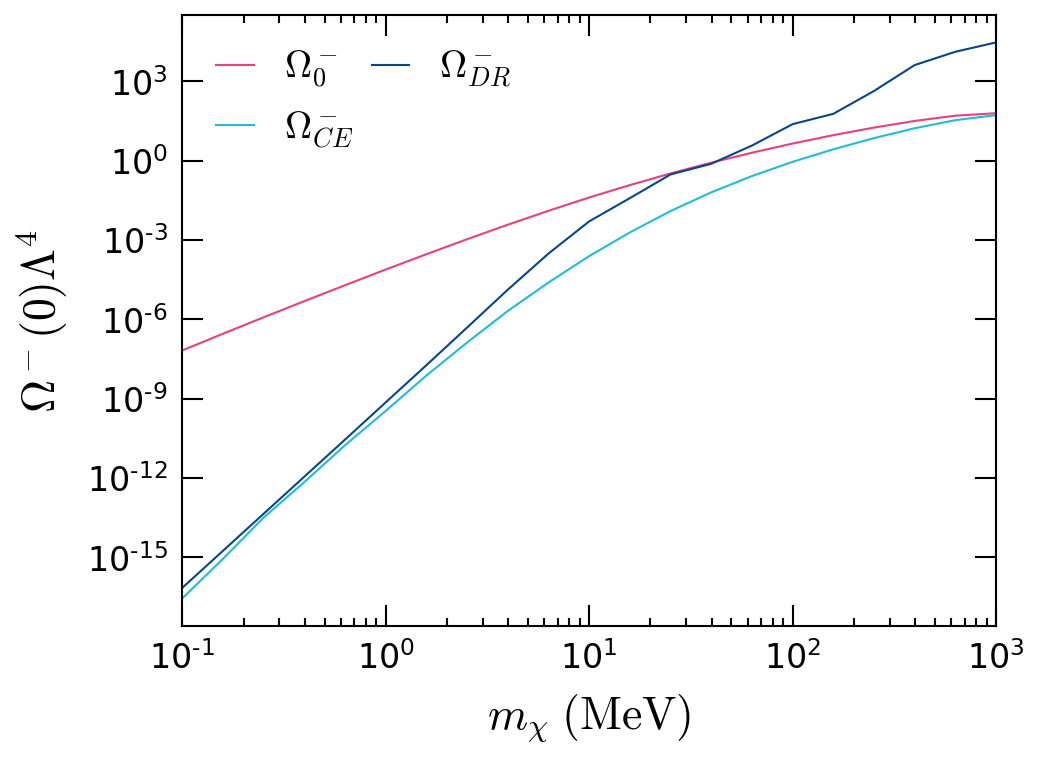

In [58]:
plt.loglog(rate0[0], rate0[1], label = r'$\Omega^-_0$')
plt.loglog(rate1[0], rate1[1], label = r'$\Omega^-_{CE}$')
plt.loglog(rate2[0], rate2[1]*echarge**2, label = r'$\Omega^-_{DR}$')
# plt.loglog(rate1[0], rate1[1]/rate2[1])

# scale = (1e6)**4 * 5
# plt.loglog(DeRate_e[0], DeRate_e[1]*scale, ls='--', label = r'$e\mathrm{-vec}$')
# plt.loglog(DeRate_DP[0], DeRate_DP[1] * scale, ls='--', label = r'$\mathrm{Dark\; Photon}$')
# plt.loglog(DeRate_p[0], DeRate_p[1] * scale, ls='--', label = r'$p\mathrm{-vec}$')
# plt.loglog(DeRate_ph[0], DeRate_ph[1] * scale, ls='--', label = r'$\mathrm{Phonons}$')
plt.xlim(1e-1, 1e3)
plt.xlabel(r'$m_\chi\;\mathrm{(MeV)}$')
plt.ylabel(r'$\Omega^-(0) \Lambda^4$')

plt.legend(ncol = 2)


(0.1, 2.0)

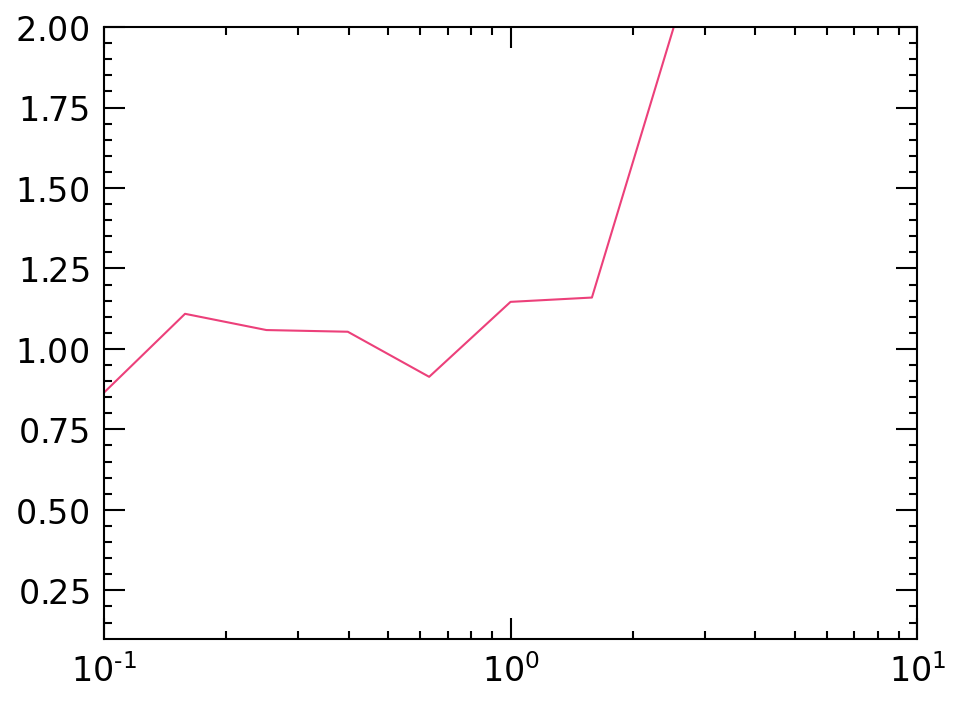

In [46]:
plt.plot(rate1[0], rate2[1]*echarge**2/rate1[1])
plt.xscale('log')
plt.xlim(1e-1, 1e1)
plt.ylim(0.1, 2)
